# 数据预处理

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('../input/train.csv', index_col=0)
df_test = pd.read_csv('../input/test.csv', index_col=0)

## 目标变量对数化

In [3]:
y_train = np.log1p(df_train['SalePrice'])
# train_df.drop(['SalePrice'], axis=1, inplace=True)
del df_train['SalePrice']

## 训练数据和测试数据合并，一起处理

注意：这是因为 Kaggle 问题的特殊性，测试数据集已知才可以这么做。

一般情况下，应该分开处理，因为测试数据集很可能是随时来的，不是固定好的。

In [4]:
# axis=0 表示按行合并
all_df = pd.concat([df_train, df_test], axis=0)
all_df.shape

(2919, 79)

## 处理 MSSubClass 字段

这个字段虽然是数值，但其含义是字符型，所以要做独热编码处理。

In [5]:
all_df.MSSubClass.dtypes

dtype('int64')

In [6]:
all_df.MSSubClass = all_df.MSSubClass.astype(str)

## 将离散型字段全部做独热编码处理

In [7]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


## 空值填充

In [16]:
# 统计空值数量
all_dummy_df.isnull().sum()[all_dummy_df.isnull().sum() != 0].sort_values(
    ascending=False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

### 使用每一列的均值填补空值

In [17]:
mean_cols = all_dummy_df.mean()

LotFrontage       69.305795
LotArea        10168.114080
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
dtype: float64

使用 Pandas 的 fillna 方法。感觉上更简单一些，返回的是 DataFrame 对象，更方便后续处理。

In [19]:
all_dummy_df.fillna(mean_cols, inplace=True)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


### 再检查一下是否还有空值

In [20]:
all_dummy_df.isnull().sum().sum()

0

## 数值型变量全部做标准化处理

即处理成均值为 0，标准差为 1 的情况。

### 筛选出数值型变量

In [21]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### 数值型变量标准化

In [26]:
# 计算每一列的均值
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()

In [27]:
# 计算每一列的标准差
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()

In [28]:
all_dummy_df.loc[:, numeric_cols] = (
    all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

## 分离训练集与测试集

In [29]:
dummy_train_df = all_dummy_df.loc[df_train.index]
dummy_test_df = all_dummy_df.loc[df_test.index]

## 模型训练

In [30]:
X_train = dummy_train_df
X_test = dummy_test_df

> 要使用交叉验证或者网格搜索，排除随机数据对模型评估的影响。

### 岭回归

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()

In [33]:
np.set_printoptions(suppress=True, precision=4)

In [34]:
np.logspace(-3, 2, 50)

array([  0.001 ,   0.0013,   0.0016,   0.002 ,   0.0026,   0.0032,
         0.0041,   0.0052,   0.0066,   0.0083,   0.0105,   0.0133,
         0.0168,   0.0212,   0.0268,   0.0339,   0.0429,   0.0543,
         0.0687,   0.0869,   0.1099,   0.1389,   0.1758,   0.2223,
         0.2812,   0.3556,   0.4498,   0.569 ,   0.7197,   0.9103,
         1.1514,   1.4563,   1.8421,   2.33  ,   2.9471,   3.7276,
         4.7149,   5.9636,   7.5431,   9.541 ,  12.0679,  15.2642,
        19.307 ,  24.4205,  30.8884,  39.0694,  49.4171,  62.5055,
        79.0604, 100.    ])

使用网格搜索得到最佳超参数。

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.logspace(-3, 2, 50)}  # 50 个数

grid = GridSearchCV(
    ridge, parameters, cv=10, scoring='neg_mean_squared_error', verbose=2)

In [41]:
%%time
grid.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0012648552168552957 .....................................
[CV] ...................... alpha=0.0012648552168552957, total=   0.0s
[CV] alpha=0.0015998587196060573 .....................................
[CV] .

[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] ....................... alpha=0.005179474679231213, total=   0.0s
[CV] alpha=0.005179474679231213 ......................................
[CV] .

[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] ........................ alpha=0.02682695795279726, total=   0.0s
[CV] alpha=0.02682695795279726 .......................................
[CV] .

[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.13894954943731375 .......................................
[CV] ........................ alpha=0.13894954943731375, total=   0.0s
[CV] alpha=0.1757510624854793 ........................................
[CV] .

[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] ......................... alpha=0.5689866029018299, total=   0.0s
[CV] alpha=0.5689866029018299 ........................................
[CV] .

[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .......................... alpha=2.329951810515372, total=   0.0s
[CV] alpha=2.329951810515372 .........................................
[CV] .

[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .......................... alpha=9.540954763499943, total=   0.0s
[CV] alpha=9.540954763499943 .........................................
[CV] .

[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .......................... alpha=39.06939937054621, total=   0.0s
[CV] alpha=39.06939937054621 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0.001  ,   0.00126,   0.0016 ,   0.00202,   0.00256,   0.00324,
         0.00409,   0.00518,   0.00655,   0.00829,   0.01048,   0.01326,
         0.01677,   0.02121,   0.02683,   0.03393,   0.04292,   0.05429,
         0.06866,   0.08685,   0.10985,   0.13895,   0.17575...     19.30698,  24.42053,  30.88844,  39.0694 ,  49.41713,  62.50552,
        79.06043, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [42]:
grid.best_estimator_

Ridge(alpha=15.264179671752334, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [43]:
grid.best_score_

-0.019678891497701724

In [44]:
grid.best_params_

{'alpha': 15.264179671752334}

还可以用交叉验证试试看。

In [45]:
from sklearn.model_selection import cross_val_score

alphas = np.logspace(-3, 2, 50)
scores = []

In [47]:
%%time
for alpha in alphas:
    ridge = Ridge(alpha)
    score = np.sqrt(-cross_val_score(
        ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    scores.append(np.mean(score))

CPU times: user 33.1 s, sys: 4.44 s, total: 37.6 s
Wall time: 5.65 s


绘图观察最佳超参数的值。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


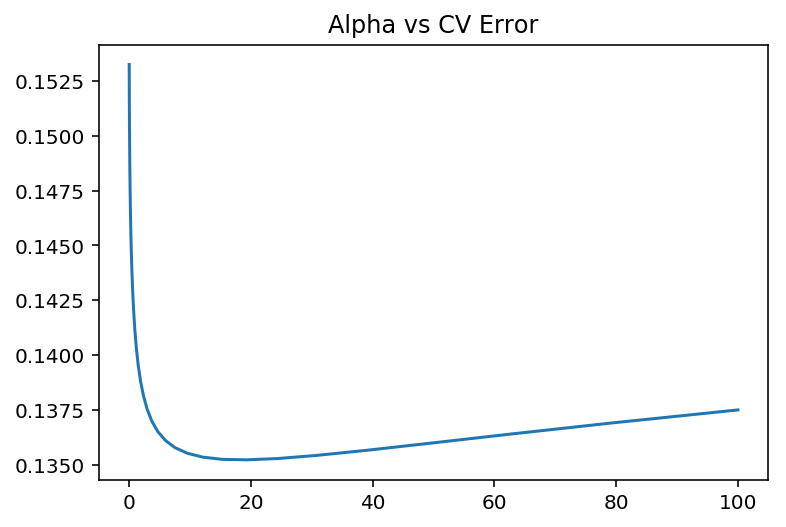

In [48]:
plt.plot(alphas, scores)
plt.title("Alpha vs CV Error")
plt.show()

最低点确实在 15 附近。

### 使用随机森林回归

In [49]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500)

In [50]:
parameters = {'max_features': [.1, .3, .5, .7, .9, .99]}

grid_rfr = GridSearchCV(
    rfr, parameters, cv=10, scoring='neg_mean_squared_error', verbose=2)

In [51]:
grid_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] max_features=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. max_features=0.1, total=   2.3s
[CV] max_features=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] ................................. max_features=0.1, total=   2.2s
[CV] max_features=0.1 ................................................
[CV] .

[CV] ................................ max_features=0.99, total=  12.8s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [53]:
grid_rfr.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
grid_rfr.best_params_

{'max_features': 0.3}

In [55]:
grid_rfr.best_score_

-0.018756494214390487

使用交叉验证试试看。

### AdaBoost 思想用于回归

In [58]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(base_estimator=Ridge(alpha= 15))
params = {'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50]}

grid_abr = GridSearchCV(
    abr, params, cv=10, scoring='neg_mean_squared_error', verbose=1)

In [59]:
grid_abr.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   22.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [62]:
grid_abr.best_params_

{'n_estimators': 10}

In [61]:
grid_abr.best_score_

-0.02323204300439075

效果不太好。

### XGBoost

In [63]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(nthread=-1)

参数列表来自 https://www.kaggle.com/omarito/gridsearchcv-xgbregressor-0-556-lb 。

In [65]:
# A parameter grid for XGBoost
params = {
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4]
}

grid = GridSearchCV(
    xgbr, params, cv=10, scoring='neg_mean_squared_error', verbose=1)

In [66]:
%%time
grid.fit(X_train, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed: 91.2min finished


CPU times: user 1h 6min 19s, sys: 12.3 s, total: 1h 6min 32s
Wall time: 1h 31min 10s


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_child_weight': [4, 5], 'gamma': [0.3, 0.4, 0.5], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'max_depth': 4,
 'min_child_weight': 4,
 'subsample': 0.8}

In [68]:
grid.best_score_

-0.01833594573652176

In [71]:
y_pred = np.expm1(grid.best_estimator_.predict(X_test))

In [75]:
res = pd.DataFrame({'ID':X_test.index,'SalePrice':y_pred})
res.to_csv('xgbr-turning.csv',index=None)

In [76]:
xgbr = XGBRegressor()

xgbr.fit(X_train, y_train)
y_pred = np.expm1(xgbr.predict(X_test))
res = pd.DataFrame({'ID':X_test.index,'SalePrice':y_pred})
res.to_csv('xgbr.csv',index=None)